In [1]:
import sys
sys.path.append('..')

from utils.plotting import *

%matplotlib inline

/home/thanos/.envs/dl/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/thanos/.envs/dl/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/thanos/.envs/dl/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/thanos/.envs/dl/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.

In [46]:
baseline_loc = '../results/animals/seeker/default/baseline.txt'
with open(baseline_loc) as f:
    baseline = float(f.read())
print('Baseline accuracy: {:.2f}%'.format(baseline * 100))

Baseline accuracy: 0.26%


In [32]:
def read_hns_epoch_logs(path_to_events_file):
    logs = {'Average loss per epoch': [],
            'Validation accuracy': []}

    for e in tf.compat.v1.train.summary_iterator(path_to_events_file):
        for v in e.summary.value:
            logs[v.tag].append(struct.unpack('f', v.tensor.tensor_content)[0])

    if len(logs['Validation accuracy']) < len(logs['Average loss per epoch']):
        logs['Validation accuracy'].append(logs['Validation accuracy'][-1])

    return pd.DataFrame(logs)

def read_hns_batch_logs(path_to_events_file):
    logs = {'classification loss': [],
            'gradients': [],
            'loss monitor': [],
            'loss regulator': [],
            'mask loss': [],
            'percentage hidden': [],
            'pixels hidden': [],
            'pixels kept': [],
            'total loss': []}

    for e in tf.compat.v1.train.summary_iterator(path_to_events_file):
        for v in e.summary.value:
            logs[v.tag].append(struct.unpack('f', v.tensor.tensor_content)[0])
            
    min_length = min([len(logs[k]) for k in logs])
    
    for k, v in logs.items():
        if len(v) > min_length:
            v.pop()
            
    return pd.DataFrame(logs)

In [33]:
location = '../logs/animals/hns/stochastic/st1/pretrained_seeker_const_a_0.98'
epoch_logs = read_hns_epoch_logs(str(next((Path(location) / 'epoch').glob('*'))))
batch_logs = read_hns_batch_logs(str(next((Path(location) / 'batch').glob('*'))))

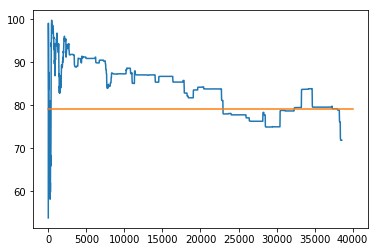

In [41]:
plt.plot([0, 40000], [79.220116, 79.220116])

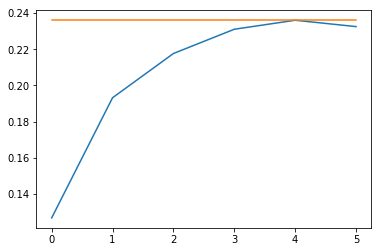

In [44]:
plt.plot(epoch_logs['Validation accuracy'])
plt.plot([0, 5], [0.236039, 0.236039])

In [61]:
max_fidelity_loc = np.argmax(epoch_logs['Validation accuracy'])
max_fidelity = epoch_logs['Validation accuracy'].iloc[max_fidelity_loc] / baseline
interpretability_resampled_loc = int(max_fidelity_loc / len(epoch_logs) * len(batch_logs))
interpretability = batch_logs['percentage hidden'].iloc[interpretability_resampled_loc]

In [63]:
max_fidelity / (interpretability + max_fidelity)

0.5350912444786933

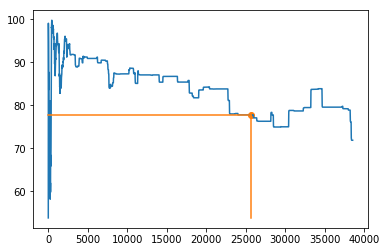

In [80]:
plt.plot(batch_logs['percentage hidden'])
plt.plot([interpretability_resampled_loc, interpretability_resampled_loc], [min(batch_logs['percentage hidden']), interpretability])
plt.plot([0, interpretability_resampled_loc], [interpretability, interpretability], color='C1')
plt.scatter([interpretability_resampled_loc], [interpretability], color='C1', zorder=0)

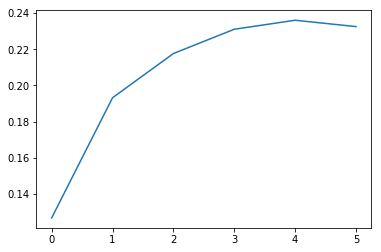

In [81]:
plt.plot(epoch_logs['Validation accuracy'])


[53.82311248779297, 99.78964233398438]